In [1]:
"""
index comparison

v1.0

v1.0 compared the indexes risk (measured by volatility) vs reward

The goal of this sheet is to macro analyze various indexes by getting the YoY growth rates, average them, 
    and get their standard deviation as a measure of risk
    
I'll need to calculate fees in order to get a better judgment of the take away from the various tools

"""

"\nindex comparison\n\nv1.0\n\nThe goal of this sheet is to macro analyze various indexes by getting the YoY growth rates, average them, \n    and get their standard deviation as a measure of risk\n    \nI'll need to calculate fees in order to get a better judgment of the take away from the various tools\n\n"

In [2]:
import yfinance as yf
import pandas as pd
import numpy as np

In [3]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

%matplotlib inline

In [4]:
"""

there is another opportunity in adjusting the risk calculation using some of the same 3blue1brown technique in 
    calculating adjusted rating:
    https://www.youtube.com/watch?v=8idr1WZ1A7Q

"""

'\n\nthere is another opportunity in adjusting the risk calculation using some of the same 3blue1brown technique in \n    calculating adjusted rating:\n    https://www.youtube.com/watch?v=8idr1WZ1A7Q\n\n'

In [5]:
"""
Put the below tickers into a list of dictionaries so i can scale up on individual stocks
    or create an object where the name points to the characteristics I'm looking for

check syntax
"""

stocks = [
    {'Name': 'sp500', 'Ticker':'^GSPC', 'Category':'index'},
#     {'Name': 'nasdaq', 'Ticker': '^IXIC', 'Category':'index'},
    {'Name': 'vanguard500', 'Ticker': 'VOO', 'Category':'tracker'},
#     {'Name': 'vanguardTotal', 'Ticker': 'VTSAX', 'Category':'tracker'},
    {'Name': 'nasdaq100', 'Ticker': 'QQQ', 'Category':'tracker'},
#     {'Name': 'AmericanLTG', 'Ticker':'AIVSX', 'Category':'tracker'},
#     {'Name': 'ValueHunting', 'Ticker':'PIODX', 'Category':'tracker'},
    {'Name': 'DA_sp1500', 'Ticker':'SDY', 'Category':'dividend aristocrat'},
    {'Name': 'DA_nasdaq', 'Ticker':'VIG', 'Category':'dividend aristocrat'},
#     {'Name': 'DA_DowJones', 'Ticker':'DVY', 'Category':'dividend aristocrat'},
#     {'Name': 'DA_PreferredShares', 'Ticker':'PFF', 'Category':'dividend aristocrat'},
#     {'Name': 'DA_WeightedByDividend', 'Ticker':'DTD', 'Category':'dividend aristocrat'},
    {'Name': 'BC_Innovation', 'Ticker':'KOIN', 'Category':'BC Benefactor'},
#     {'Name': 'BC_Economy', 'Ticker':'BLCN', 'Category':'BC Benefactor'},
#     {'Name': 'BC_WW', 'Ticker':'LEGR', 'Category':'BC Benefactor'},
    {'Name': 'QC_Bluestar', 'Ticker': 'QTUM', 'Category': 'index'}
]



In [6]:
yf.Ticker('VIG').info

{'previousClose': 117.25,
 'regularMarketOpen': 117.13,
 'twoHundredDayAverage': 117.829926,
 'trailingAnnualDividendYield': None,
 'payoutRatio': None,
 'volume24Hr': None,
 'regularMarketDayHigh': 117.9,
 'navPrice': 117.67,
 'averageDailyVolume10Day': 1210114,
 'totalAssets': 49756540928,
 'regularMarketPreviousClose': 117.25,
 'fiftyDayAverage': 112.81294,
 'trailingAnnualDividendRate': None,
 'open': 117.13,
 'toCurrency': None,
 'averageVolume10days': 1210114,
 'expireDate': None,
 'yield': 0.0185,
 'algorithm': None,
 'dividendRate': None,
 'exDividendDate': None,
 'beta': None,
 'circulatingSupply': None,
 'startDate': None,
 'regularMarketDayLow': 115.94,
 'priceHint': 2,
 'currency': 'USD',
 'regularMarketVolume': 1043595,
 'lastMarket': None,
 'maxSupply': None,
 'openInterest': None,
 'marketCap': None,
 'volumeAllCurrencies': None,
 'strikePrice': None,
 'averageVolume': 2521798,
 'priceToSalesTrailing12Months': None,
 'dayLow': 115.94,
 'ask': 118.49,
 'ytdReturn': None,


In [7]:
# indexes

sp500 = yf.Ticker("^GSPC")

In [8]:
df = sp500.history(period='max').reset_index()
df['PriorYearBW'] = df.Open/df.Open.shift(253)-1
df
df['PriorYearBW'].mean()
df['PriorYearBW'].std()

0.20209218749216318

In [9]:
for i, n in enumerate([d['Ticker'] for d in stocks if 'Ticker' in d]):
    print(i)
    df = yf.Ticker(n).history(period='max').reset_index()
    df['PriorYearBW'] = df.Open/df.Open.shift(253)-1
    stocks[i].update({"Average":df['PriorYearBW'].mean(), "Risk":df['PriorYearBW'].std(),
                      "GrowthRiskRatio":df['PriorYearBW'].mean()/df['PriorYearBW'].std(),
                    "StartDate":df['Date'].iloc[0], "EndDate":df['Date'].iloc[-1]})
    
    stocks[i].update(yf.Ticker(n).info)
    

0
1
2
3
4
5
6


In [10]:
summary_df = pd.DataFrame(stocks)
summary_df = summary_df.sort_values(by=['GrowthRiskRatio'], ascending=False)
summary_df

,Name,Ticker,Category,Average,Risk,GrowthRiskRatio,StartDate,EndDate,previousClose,regularMarketOpen,...,morningStarOverallRating,earningsQuarterlyGrowth,pegRatio,lastCapGain,category,fiveYearAverageReturn,phone,longBusinessSummary,companyOfficers,trailingPE
1,vanguard500,VOO,tracker,0.131417,0.091550,1.435471,2010-09-09,2020-05-29,278.5000,278.03,...,NaN,NaN,NaN,NaN,Large Blend,0.0982,866-499-8473,The investment seeks to track the performance ...,[],NaN
6,QC_Bluestar,QTUM,index,0.205885,0.174700,1.178507,2018-09-05,2020-05-29,28.2975,28.17,...,NaN,NaN,NaN,NaN,Technology,NaN,833-333-9383,The investment seeks to track the total return...,[],NaN
5,BC_Innovation,KOIN,BC Benefactor,0.101438,0.105989,0.957067,2018-01-30,2020-05-29,28.4141,28.28,...,NaN,NaN,NaN,NaN,Technology,NaN,833-466-6383,The investment seeks to provide investment res...,[],NaN
4,DA_nasdaq,VIG,dividend aristocrat,0.096672,0.135774,0.712005,2006-05-02,2020-05-29,117.2500,117.13,...,NaN,NaN,NaN,NaN,Large Blend,0.0997,800-662-7447,The investment seeks to track the performance ...,[],NaN
3,DA_sp1500,SDY,dividend aristocrat,0.095346,0.148072,0.643919,2005-11-15,2020-05-29,91.2400,90.70,...,NaN,NaN,NaN,NaN,Large Value,0.0715,866-787-2257,The investment seeks to provide investment res...,[],NaN
2,nasdaq100,QQQ,tracker,0.103786,0.269740,0.384763,1999-03-10,2020-05-29,229.9900,230.43,...,NaN,NaN,NaN,NaN,Large Growth,0.1730,800-983-0903,The investment seeks investment results that g...,[],59.91271
0,sp500,^GSPC,index,0.077133,0.202092,0.381674,1927-12-30,2020-05-29,3029.7300,3025.17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
#stocks

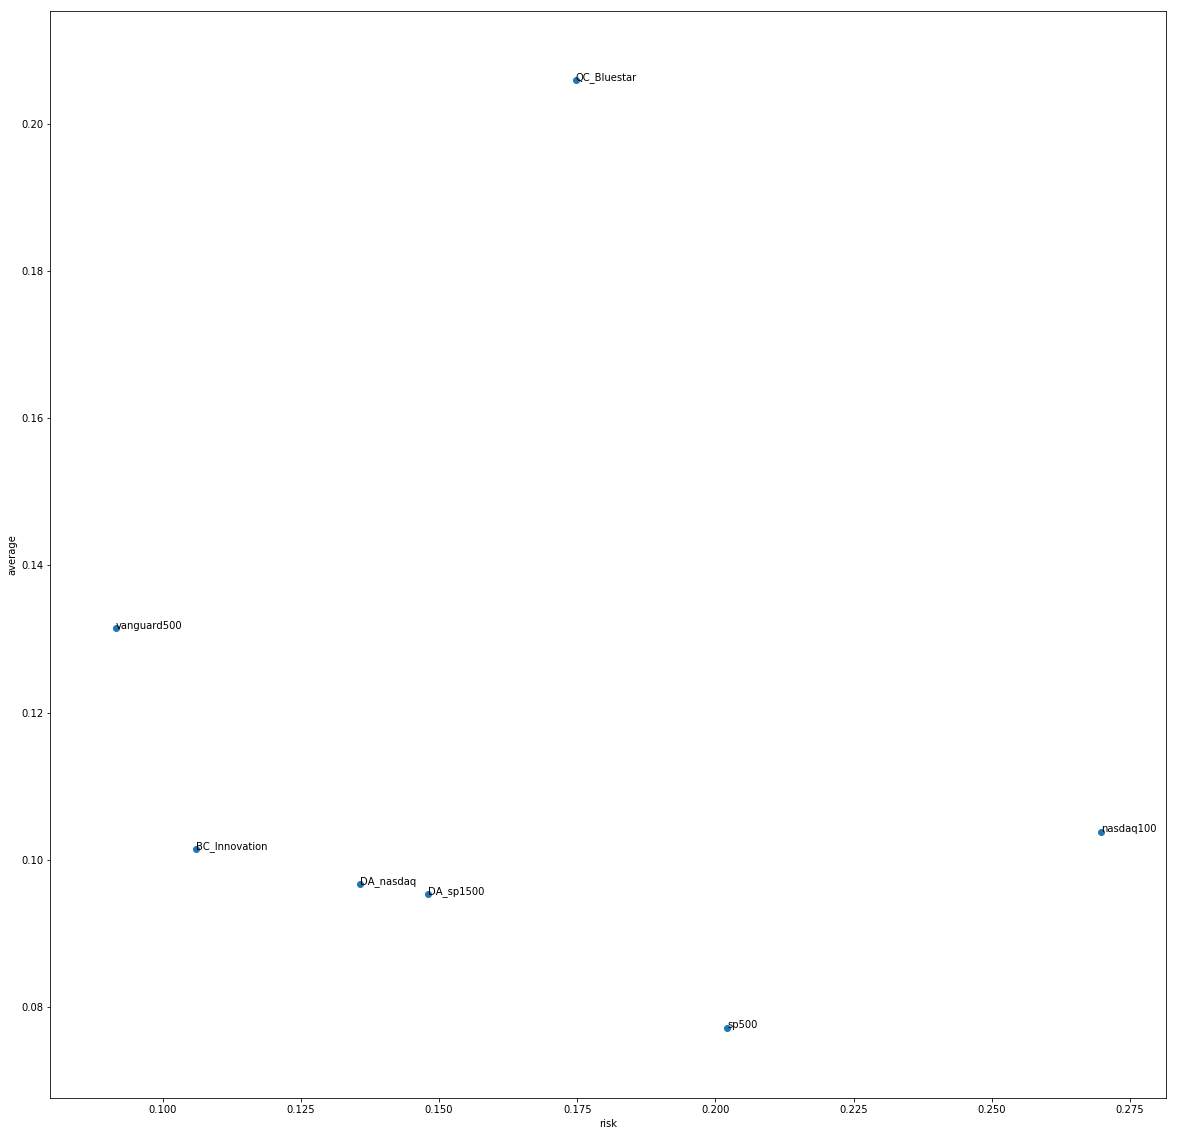

In [12]:
plt.rcParams['figure.figsize'] = [20, 20]
fig, ax = plt.subplots()
ax.scatter(summary_df.Risk, summary_df.Average)
plt.xlabel('risk')
plt.ylabel('average')

for i, txt in enumerate([d['Name'] for d in stocks if 'Name' in d]):
    ax.annotate(txt, (summary_df.Risk[i], summary_df.Average[i]))

In [13]:
"""
Need to compare the top performer to the others using the same time periods

there are two approaches and i should do each of them

one approach is to compare apples to apples by making sure there is the same date range
    find the greater min date of the two I'm comparing 
    
the other approach is to adjust the growthriskratio with the same idea that is in this video
    https://www.youtube.com/watch?v=8idr1WZ1A7Q
"""

"\nNeed to compare the top performer to the others using the same time periods\n\nthere are two approaches and i should do each of them\n\none approach is to compare apples to apples by making sure there is the same date range\n    find the greater min date of the two I'm comparing \n    \nthe other approach is to adjust the growthriskratio with the same idea that is in this video\n    https://www.youtube.com/watch?v=8idr1WZ1A7Q\n"

In [14]:
# return the row of the highest growthriskratio

bestGRR = summary_df.iloc[0]
bestGRR

Name                                                           vanguard500
Ticker                                                                 VOO
Category                                                           tracker
Average                                                           0.131417
Risk                                                             0.0915498
                                               ...                        
fiveYearAverageReturn                                               0.0982
phone                                                         866-499-8473
longBusinessSummary      The investment seeks to track the performance ...
companyOfficers                                                         []
trailingPE                                                             NaN
Name: 1, Length: 109, dtype: object

In [15]:
print(len(summary_df.index))

7


In [16]:
bestGRR.StartDate

Timestamp('2010-09-09 00:00:00')

In [17]:
df = yf.Ticker('AIVSX').history(start=bestGRR.StartDate, end=bestGRR.EndDate).reset_index()
df['PriorYearBW'] = df.Open/df.Open.shift(253)-1
print(df['PriorYearBW'].mean())
print(df['PriorYearBW'].std())

0.11344172469843519
0.10026178521653072


In [18]:
for index, row in summary_df.tail(len(summary_df.index)).iterrows():
    print(index)
    df = yf.Ticker(row.Ticker).history(start=bestGRR.StartDate, end=bestGRR.EndDate).reset_index()
    df['PriorYearBW'] = df.Open/df.Open.shift(253)-1
    
    stocks[index].update({bestGRR.Name+'_comparison_avg':df['PriorYearBW'].mean(), 
                      bestGRR.Name+'_comparison_risk':df['PriorYearBW'].std(),
                         bestGRR.Name+'_comparison_GRR':df['PriorYearBW'].mean()/df['PriorYearBW'].std()})

1
6
5
4
3
2
0


In [19]:
print(stocks)

[{'Name': 'sp500', 'Ticker': '^GSPC', 'Category': 'index', 'Average': 0.07713340977639148, 'Risk': 0.20209218749216318, 'GrowthRiskRatio': 0.38167437709279384, 'StartDate': Timestamp('1927-12-30 00:00:00'), 'EndDate': Timestamp('2020-05-29 00:00:00'), 'previousClose': 3029.73, 'regularMarketOpen': 3025.17, 'twoHundredDayAverage': 3015.3687, 'trailingAnnualDividendYield': None, 'payoutRatio': None, 'volume24Hr': None, 'regularMarketDayHigh': 3049.14, 'navPrice': None, 'averageDailyVolume10Day': 5542678571, 'totalAssets': None, 'regularMarketPreviousClose': 3029.73, 'fiftyDayAverage': 2883.668, 'trailingAnnualDividendRate': None, 'open': 3025.17, 'toCurrency': None, 'averageVolume10days': 5542678571, 'expireDate': None, 'yield': None, 'algorithm': None, 'dividendRate': None, 'exDividendDate': None, 'beta': None, 'circulatingSupply': None, 'startDate': None, 'regularMarketDayLow': 2998.61, 'priceHint': 2, 'currency': 'USD', 'regularMarketVolume': 86861591, 'lastMarket': None, 'maxSupply':

In [20]:
summary_df = pd.DataFrame(stocks)
summary_df = summary_df.sort_values(by=['vanguard500_comparison_GRR'], ascending=False)
summary_df[['Name','Ticker', 'vanguard500_comparison_GRR','vanguard500_comparison_risk',
            'vanguard500_comparison_avg'
           ]]

,Name,Ticker,vanguard500_comparison_GRR,vanguard500_comparison_risk,vanguard500_comparison_avg
2,nasdaq100,QQQ,1.651615,0.108096,0.178533
4,DA_nasdaq,VIG,1.560634,0.078285,0.122175
1,vanguard500,VOO,1.435290,0.091569,0.131428
3,DA_sp1500,SDY,1.426114,0.085516,0.121955
0,sp500,^GSPC,1.211120,0.089413,0.108290
6,QC_Bluestar,QTUM,1.174483,0.175170,0.205734
5,BC_Innovation,KOIN,0.955127,0.106143,0.101380


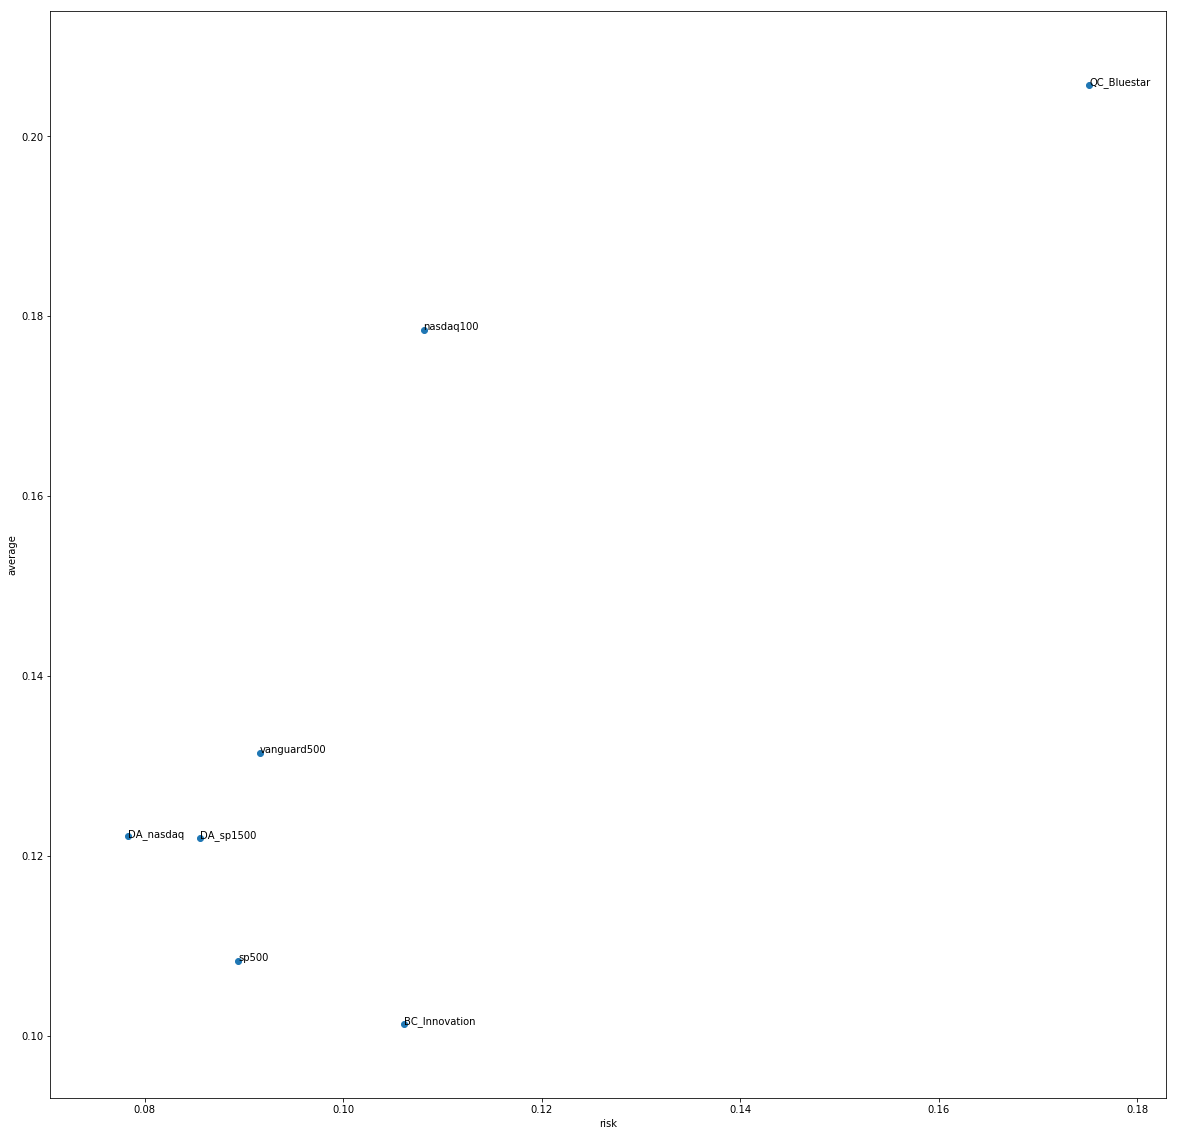

In [21]:
plt.rcParams['figure.figsize'] = [20, 20]
fig, ax = plt.subplots()
ax.scatter(summary_df.vanguard500_comparison_risk, summary_df.vanguard500_comparison_avg)
plt.xlabel('risk')
plt.ylabel('average')

for i, txt in enumerate([d['Name'] for d in stocks if 'Name' in d]):
    ax.annotate(txt, (summary_df.vanguard500_comparison_risk[i], summary_df.vanguard500_comparison_avg[i]))

In [22]:
ax.scatter(summary_df.vanguard500_comparison_risk, summary_df.vanguard500_comparison_avg)

In [25]:
stocks[0]['Ticker']

'^GSPC'